In [21]:
# All required libraries.
import pandas as pd
import matplotlib.pyplot as plt;
import seaborn as sns;
from custom_libs import helper
from importlib import reload
import numpy as np

In [4]:
df = pd.read_csv('data/uci-heart-disease/processed.cleveland-cleansed.data')
# 303 records and 14 columns.
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [19]:
# From the data-dictionary, we can observe that only 'oldpeak' is in float format. Other data can be changed from float to int.
df['age'] = df['age'].astype('int')
df['sex'] = df['sex'].astype('int')
df['cp'] = df['cp'].astype('int')
df['trestbps'] = df['trestbps'].astype('int')
df['chol'] = df['chol'].astype('int')
df['fbs'] = df['fbs'].astype('int')
df['restecg'] = df['restecg'].astype('int')
df['thalach'] = df['thalach'].astype('int')
df['exang'] = df['exang'].astype('int')
df['slope'] = df['slope'].astype('int')
df['ca'] = df['ca'].astype('int')
df['thal'] = df['ca'].astype('int')

In [20]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,2,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,0,0


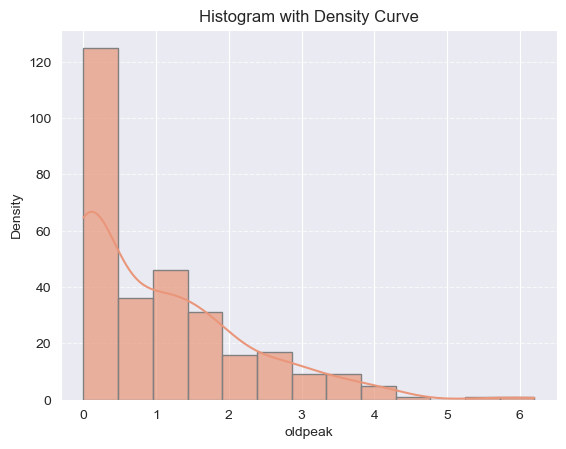

In [26]:
key = 'oldpeak'
sns.histplot(df[key], kde=True, color='darksalmon', edgecolor='grey', alpha=0.7)

plt.title('Histogram with Density Curve')
plt.xlabel(key)
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(df))

MinMaxScaler()


In [32]:
df2 = scaler.transform(df)
df2

array([[0.70833333, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.79166667, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.79166667, 1.        , 1.        , ..., 0.66666667, 0.66666667,
        1.        ],
       ...,
       [0.8125    , 1.        , 1.        , ..., 0.66666667, 0.66666667,
        1.        ],
       [0.58333333, 1.        , 1.        , ..., 0.33333333, 0.33333333,
        1.        ],
       [0.58333333, 0.        , 0.33333333, ..., 0.33333333, 0.33333333,
        1.        ]])

In [34]:
key = '5'
sns.histplot(df2[key], kde=True, color='darksalmon', edgecolor='grey', alpha=0.7)

plt.title('Histogram with Density Curve')
plt.xlabel(key)
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices